In [8]:
import sys
sys.path.append(str('/home/jupyter/'))
import pandas as pd
from configparser import ConfigParser
from repo.MyConfigParser import MyConfigParser
from repo.Optimization import SavantPSO
import numpy as np

# Read In

In [9]:
updated_config = ConfigParser()
config_in_path = "/home/jupyter/IT/Jun 2024/config ups it.ini"
updated_config.read(config_in_path)

getdict = MyConfigParser()
config_dict=getdict.GetDict(updated_config)
region = config_dict['CLIENTINFO']['country']
cutoff_month = config_dict['PROPHETSETTING']['cut_off_point']
base_start = config_dict['PROPHETSETTING']['reference_start_date1']
base_end = config_dict['PROPHETSETTING']['reference_end_date1']
periods = config_dict['PROPHETSETTING']['periods']
base_periods  = config_dict['PROPHETSETTING']['base_periods']

output_bucket = config_dict["FILEPATH"]["output_bucket"]
folder_name = config_dict["FILEPATH"]["folder_name"]

base_path = config_dict["FILEPATH"]["base_path"]

boundary_df_in_path = base_path + config_dict["FILEPATH"]["boundary_df_in_path"]
daily_df_out_path = base_path + config_dict["FILEPATH"]["daily_df_out_path"]
analytical_file_path = base_path + config_dict["FILEPATH"]["analytical_file_path"]
cuts_df_in_path = base_path + config_dict["FILEPATH"]["cuts_df_in_path"]
plot_name = base_path + config_dict["FILEPATH"]["plot_name"]
constraint_file_name = base_path + config_dict["FILEPATH"]["constraint_file_name"]
breakdown_ls = [config_dict['CLIENTINFO'][i] for i in [f'breakdown{i}' for i in range(1,5)] if config_dict['CLIENTINFO'][i] != None]

small_market_str = ''
pre_forecast_period_budget = float(config_dict['CLIENTINFO']['pre_forecast_period_budget'])
client_budget = float(config_dict['CLIENTINFO']['client_budget'])

save_date = config_dict['CLIENTINFO']['save_date']

In [10]:
# Get forecasters
bdDf = pd.read_csv(cuts_df_in_path)#.drop('Unnamed: 0', axis = 1)
cuts_df = bdDf.reset_index(drop = True)
cuts_df['forecaster_name_list'] =  cuts_df['market'] + ' ' + cuts_df['account_type'] + ' ' + cuts_df['funnel'] + '.pkl' #' 05.19.2021 Final.pkl'
cuts_df['periods'] = periods
# get model list
forecasters_array = cuts_df.forecaster_name_list

# Get analytical file
analytical_file = pd.read_csv(analytical_file_path).drop('Unnamed: 0', axis = 1)
analytical_file['ds'] = pd.to_datetime(analytical_file['ds'])
analytical_file_check_version = analytical_file.copy()

# Get constrain file
constraint_file = pd.read_csv(constraint_file_name)
constraint_file['init'] = constraint_file[['MinWeight', 'MaxWeight']].mean(axis = 1)

# Functions

In [11]:
resultPSO = SavantPSO(cuts_df, analytical_file, constraint_file, config_dict)

In [12]:
itNum = 80
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
result = resultPSO.run_pso(options, itNum = itNum)

2024-06-05 14:43:44,926 - pyswarms.single.global_best - INFO - Optimize for 80 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


/home/jupyter/IT/Jun 2024/Input Weight History 06.05.2024.csv


pyswarms.single.global_best:   0%|          |0/80

[1.   1.   1.   1.   1.   1.   1.   0.95 1.   1.   1.   1.   1.   1.
 1.   1.   0.95 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -56839.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.95 1.   1.   1.   1.   1.   1.
 1.   1.   0.95 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -56839.0
client_budget - analytical_spend_latest_period: 0
[1.   1.   1.   1.   1.   1.   1.   0.95 1.   1.   1.   1.   1.   1.
 1.   1.   0.95 1.  ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next yea

pyswarms.single.global_best:   1%|▏         |1/80, best_cost=-56839.0

yhat: -56839.0
client_budget - analytical_spend_latest_period: 0
[1.09877903 0.95690893 1.18449847 1.11020161 1.03063722 0.93209415
 1.1952759  0.97536443 1.06822757 1.00807006 0.97397482 0.91272899
 1.09669934 1.19699135 1.10087348 1.02498588 0.99784179 1.11082826]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56928.0
client_budget - analytical_spend_latest_period: 0
[0.97038486 1.06132211 0.84433106 0.88912731 0.96622875 0.84614856
 0.9584226  0.98556953 0.8447224  1.10730265 0.94278894 0.92561059
 0.97690841 1.08152626 0.82296162 1.17442243 0.96899346 0.82369943]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:   2%|▎         |2/80, best_cost=-57531.0

yhat: -57308.0
client_budget - analytical_spend_latest_period: 0
[1.18474664 0.81584559 0.94526116 0.80703851 0.99931662 1.17670647
 0.9122418  0.9458146  1.07535814 1.01536251 0.90294246 1.18569184
 1.11988568 0.91124775 1.13114411 0.99574522 0.98753728 1.14735306]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56262.0
client_budget - analytical_spend_latest_period: 0
[0.89451056 1.05452834 1.01693334 1.09741522 0.83531735 1.04033446
 0.8790333  0.97694875 1.06506115 1.18302188 1.19979727 0.82793504
 0.90571148 1.08518492 0.9698342  0.90736208 0.91899724 1.02549288]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   4%|▍         |3/80, best_cost=-57609.0

yhat: -56516.0
client_budget - analytical_spend_latest_period: 0
[0.83775709 1.00011846 1.12454699 0.9174682  0.92450812 0.89843764
 1.00245693 0.97286764 1.03037369 1.01984249 0.80259517 0.98588438
 1.08679631 0.9868924  1.09443336 0.92001887 0.92636609 1.11938651]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -56743.0
client_budget - analytical_spend_latest_period: 0
[1.17596221 0.99731645 1.11516208 0.82813669 1.02031741 1.15792215
 1.15986769 0.93040437 0.85815622 0.84619463 0.96939948 1.09736457
 0.80031139 1.03427726 1.04583152 1.02608129 0.91114928 1.19925646]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   5%|▌         |4/80, best_cost=-57609.0

yhat: -56794.0
client_budget - analytical_spend_latest_period: 0
[0.88550485 1.11152355 0.88639503 1.02978417 0.82968423 0.95663864
 1.06540137 0.95616878 0.94289897 1.02120858 1.09493665 1.15558322
 1.00876189 1.00634301 1.00376385 0.80870988 0.92328377 1.0374488 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.224999999984
yhat: -56599.0
client_budget - analytical_spend_latest_period: 0
[0.97558973 0.90655768 1.14483811 0.89788299 1.10691019 1.18760477
 0.98413646 0.95988304 1.0517392  0.90495468 1.0743227  0.91866615
 1.07771516 0.94610905 1.04733595 1.12874348 0.95417759 0.92221073]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   6%|▋         |5/80, best_cost=-57609.0

yhat: -56965.0
client_budget - analytical_spend_latest_period: 0
[0.93559456 1.13658011 1.08157116 1.14437366 1.12521268 0.95860204
 1.08142077 0.90199943 0.82089957 1.01939004 0.93767431 0.9022753
 0.90125769 0.99667897 0.88112134 1.06592029 0.99310314 0.91694261]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57367.0
client_budget - analytical_spend_latest_period: 0
[1.14593554 1.1767867  1.11731954 0.91389158 1.12931255 1.16033092
 1.18162222 0.95796173 0.82396251 0.95705371 1.10859877 1.11757537
 0.91949674 0.81878964 0.9899458  0.81800074 0.95264462 1.02943993]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:   8%|▊         |6/80, best_cost=-57609.0

yhat: -57038.0
client_budget - analytical_spend_latest_period: 0
[0.97719757 1.10635343 0.850186   0.8444857  0.98064912 0.90980967
 1.04445379 0.91613517 1.07236756 1.0171592  1.14735729 1.0315761
 1.16046476 0.93657113 1.12215396 0.88851515 0.92620298 1.16034418]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56199.0
client_budget - analytical_spend_latest_period: 0
[0.88786306 1.01094141 1.03848849 0.87852868 1.09530876 1.08441697
 0.95238484 0.93035196 0.98092865 1.00316844 1.0801351  0.89062859
 1.1325559  1.0563529  0.88531392 0.89801003 0.91182733 1.12048329]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:   9%|▉         |7/80, best_cost=-57609.0

yhat: -56890.0
client_budget - analytical_spend_latest_period: 0
[1.00710945 1.03054901 1.04318554 0.96879473 0.80967489 0.82219519
 0.96595004 0.90228487 0.8699797  1.0146305  0.8945365  1.12886273
 0.95902887 0.84181967 0.90706595 1.08741476 0.94118061 0.92081396]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -56561.0
client_budget - analytical_spend_latest_period: 0
[1.02220051 0.82332509 0.9202608  0.80915409 1.01788405 0.97671475
 1.12247114 0.98475675 1.08886884 1.04239419 0.9991419  1.07815928
 0.89689529 0.83813012 1.15844987 0.96982618 0.94164249 1.18589496]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  10%|█         |8/80, best_cost=-57918.0

yhat: -57117.0
client_budget - analytical_spend_latest_period: 0
[1.02208368 0.92119323 0.81852842 1.10392552 1.03941181 1.10424319
 0.850058   0.96473627 1.0459632  1.01577659 1.03156705 1.16743641
 1.12635821 1.12722315 1.06424801 0.8593386  0.93098839 1.06110017]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56504.0
client_budget - analytical_spend_latest_period: 0
[1.14209251 1.01789787 1.17565477 1.11789037 0.92539697 0.85756418
 0.87387785 0.91429342 1.15013382 1.06252938 0.88557258 0.84783187
 1.04205348 0.99265889 0.98541899 1.02954477 0.94122256 0.80783011]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  11%|█▏        |9/80, best_cost=-57918.0

yhat: -56753.0
client_budget - analytical_spend_latest_period: 0
[1.03105827 0.80672291 0.98786564 0.8304119  0.85618514 0.92183538
 1.1297291  0.99576109 1.17431281 1.01718235 1.14542215 1.17472221
 0.83927111 0.95937021 1.19687568 1.01523491 0.9009735  1.1803519 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56194.0
client_budget - analytical_spend_latest_period: 0
[0.84272618 0.80787392 0.99176341 0.9505     0.81822424 1.14152234
 1.04130534 0.93076519 1.15392541 1.07893481 1.15955421 1.00000737
 1.16074323 1.09569695 1.17921042 1.04312328 0.91609238 0.87270771]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  12%|█▎        |10/80, best_cost=-57918.0

yhat: -57351.0
client_budget - analytical_spend_latest_period: 0
[1.02527975 1.0647176  1.14858088 0.98648277 1.07782499 1.11370481
 0.96385541 0.90170389 0.83065763 1.01898675 0.83891546 1.16486521
 0.94911983 1.16524676 0.84565496 1.15524075 0.96511132 0.84843191]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57187.0
client_budget - analytical_spend_latest_period: 0
[0.9783079  1.04240025 0.80608092 1.1533109  1.1365283  0.98990883
 1.19150893 0.93512015 1.12095901 1.0927256  0.99536155 1.14995973
 0.82599232 1.1550695  0.90973075 1.04800088 0.96899326 0.9325725 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  14%|█▍        |11/80, best_cost=-57918.0

yhat: -56709.0
client_budget - analytical_spend_latest_period: 0
[1.00469116 0.89637255 0.87779318 1.13859157 0.88101585 0.8757711
 1.19392317 0.99461781 0.88762128 1.02226784 0.92827309 1.09952556
 1.04593708 0.91710793 0.89338618 0.86892982 0.91154957 0.9191804 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57060.0
client_budget - analytical_spend_latest_period: 0
[1.11319085 0.87329095 1.03732034 0.907371   1.01442886 0.84163878
 0.91905441 0.92634122 1.05923147 1.10338083 0.8086365  0.87090034
 0.8981509  1.13555599 1.03721277 1.03118429 0.99841052 0.9949069 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  15%|█▌        |12/80, best_cost=-57918.0

yhat: -57413.0
client_budget - analytical_spend_latest_period: 0
[0.97768608 1.13635937 0.99391789 0.87202504 1.07921212 1.02385773
 0.98077983 0.96685785 0.92925186 1.0261981  1.00909338 1.02990621
 1.1184331  1.05124703 0.93211762 1.00379879 0.94068695 0.98072289]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56828.0
client_budget - analytical_spend_latest_period: 0
[0.82730314 1.09756892 0.84229497 1.04784291 0.85877768 1.06934521
 1.0613019  0.91044199 0.97402403 1.08836264 1.04846409 1.0053681
 0.96314615 1.11439518 1.14373635 0.98459749 0.90627284 1.05582838]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  16%|█▋        |13/80, best_cost=-57918.0

yhat: -57667.0
client_budget - analytical_spend_latest_period: 0
[0.94651268 0.94468369 1.102615   0.99746126 0.86276845 1.15469548
 1.15837917 0.91948076 0.96105315 1.02995933 1.08255487 0.94488985
 1.16961354 1.15745273 0.95545801 1.1295419  0.96208342 1.02674973]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56632.0
client_budget - analytical_spend_latest_period: 0
[0.96917369 0.89790711 1.02982835 1.16879006 1.09214238 0.88283997
 0.80814549 0.98803844 0.8925552  1.04971575 0.86266998 1.13532303
 1.02008235 1.04102929 0.80958334 0.91384571 0.9022703  1.10317987]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is

pyswarms.single.global_best:  18%|█▊        |14/80, best_cost=-57918.0

yhat: -56577.0
client_budget - analytical_spend_latest_period: 0
[0.91758455 1.13347465 1.19577962 1.12051788 1.074604   0.83418252
 0.90994277 0.96217801 0.97782358 1.03284661 1.12860114 0.86996286
 1.1634697  0.84203569 0.97050364 0.82919448 0.9703053  1.06082391]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.224999999984
yhat: -57203.0
client_budget - analytical_spend_latest_period: 0
[1.10851738 1.12252206 1.19754234 0.85529492 0.90438907 1.12903628
 0.93958307 0.94935792 0.82637778 1.01599479 1.06299978 0.84510299
 1.06380592 0.96010978 0.89396456 0.83558996 0.99231849 1.1329486 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  19%|█▉        |15/80, best_cost=-57918.0

yhat: -56575.0
client_budget - analytical_spend_latest_period: 0
[0.89541224 0.89800741 0.8614358  0.83152294 0.86169698 0.92007193
 1.0458293  0.99311904 0.97689191 1.03318436 1.14153343 0.80909464
 1.10496377 0.91879364 0.97307262 0.93686433 0.96817811 1.06233524]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56187.0
client_budget - analytical_spend_latest_period: 0
[0.83358898 0.92637541 0.92964766 0.93864459 1.10776645 0.94907584
 1.05513349 0.90258332 1.17266693 0.97774084 0.84323349 0.96787431
 1.07372873 0.87954964 0.97067281 1.16769191 0.96697983 1.14173805]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  20%|██        |16/80, best_cost=-57918.0

yhat: -56316.0
client_budget - analytical_spend_latest_period: 0
[0.88045215 1.08090416 0.92480725 0.97806358 1.08633864 1.00594657
 1.1698879  0.90210437 0.94987231 1.03449823 1.11800203 1.16202203
 1.02466077 0.99173092 0.96790875 1.03918467 0.95350694 1.05540383]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56666.0
client_budget - analytical_spend_latest_period: 0
[1.001785   1.1196811  1.07108355 1.01112386 0.8851689  1.1786517
 1.17668685 0.95038858 1.11455927 0.94724366 1.03284936 1.08223955
 1.05860444 0.80106697 1.03686977 1.05717134 0.92966166 1.1258454 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  21%|██▏       |17/80, best_cost=-57918.0

yhat: -55913.0
client_budget - analytical_spend_latest_period: 0
[0.8720142  0.84440394 1.00583806 1.12724018 0.88464801 1.07308821
 0.8692769  0.91014436 0.9230413  1.03481318 1.08888149 1.11183513
 0.93654601 1.04993447 0.95464471 1.12749558 0.93014961 1.02938377]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56280.0
client_budget - analytical_spend_latest_period: 0
[1.15464363 0.89335701 0.80216655 1.06481596 1.05100088 0.97832601
 0.880843   0.99213331 1.01272037 0.92768923 0.80786845 1.1844817
 1.02350243 1.13485737 1.08768145 0.94879521 0.98408445 1.10684083]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 5

pyswarms.single.global_best:  22%|██▎       |18/80, best_cost=-57918.0

yhat: -56145.0
client_budget - analytical_spend_latest_period: 0
[0.87384079 1.04215823 1.08076895 0.86197102 1.08063842 1.12832318
 0.97712902 0.91641382 0.89776586 1.03329686 1.03539321 1.04174929
 0.85828745 1.08702616 0.92694811 1.19818679 0.90047308 0.99047903]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56820.0
client_budget - analytical_spend_latest_period: 0
[0.88395211 1.09761151 0.96451062 1.09120795 0.80120022 1.17746399
 0.99726663 0.92285934 0.91128613 0.92113897 1.01038317 0.86281551
 0.98556378 1.06106267 1.11757793 0.84216021 0.92694986 1.0875445 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  24%|██▍       |19/80, best_cost=-57918.0

yhat: -56918.0
client_budget - analytical_spend_latest_period: 0
[0.87938721 0.82008713 1.14691131 1.03923576 0.85488047 1.15246743
 1.08562812 0.91961711 0.87447137 1.03323372 0.98794518 0.96885471
 1.19968802 1.11400839 0.89537916 0.83089867 0.97917436 0.95596513]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57000.0
client_budget - analytical_spend_latest_period: 0
[1.04873903 0.88530048 1.13348178 1.0864049  1.00457471 0.95025994
 1.10700161 0.9502993  0.8193412  0.92144206 0.80341138 0.94301054
 0.94145121 0.97326355 1.12538499 1.15086445 0.96418179 1.05822119]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  25%|██▌       |20/80, best_cost=-5.8e+4 

yhat: -56928.0
client_budget - analytical_spend_latest_period: 0
[0.89569184 1.01187501 1.19113712 0.80459735 1.03772004 1.14562501
 1.18008988 0.92193843 0.85530948 1.03072513 0.94339487 0.90572784
 1.14205334 1.11980103 0.8666718  0.86209376 0.94628009 0.92317606]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57479.0
client_budget - analytical_spend_latest_period: 0
[0.80659335 1.07916179 0.87617655 1.05364719 0.80980402 1.1105514
 0.80469896 0.97434508 1.1408121  0.92713567 1.02385166 1.01935859
 0.89847949 0.88575782 1.10592959 1.00550538 0.99546671 1.02480293]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  26%|██▋       |21/80, best_cost=-5.8e+4

yhat: -57248.0
client_budget - analytical_spend_latest_period: 0
[0.91001522 1.17857563 0.82791239 0.95713833 1.19934638 1.13848971
 0.86260925 0.92404032 0.84550029 1.02905558 0.89977091 0.85687879
 1.08267696 1.12475245 0.84377189 0.88903112 0.90346916 0.8929715 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57263.0
client_budget - analytical_spend_latest_period: 0
[0.97229026 0.85771953 1.01711477 1.02273601 1.06041251 0.85317329
 0.97513458 0.99262779 1.05414037 0.93465372 0.81837041 1.09864381
 0.86335495 0.80630707 1.07185144 0.85752491 0.91470228 0.99439138]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  28%|██▊       |22/80, best_cost=-5.8e+4

yhat: -56806.0
client_budget - analytical_spend_latest_period: 0
[0.92019007 0.91279543 0.91733426 1.06828785 0.93741832 1.13280605
 0.95731376 0.92586233 0.84672024 1.02790069 0.86183829 0.82297884
 1.03689351 1.12763403 0.82807379 0.90836135 0.95882542 0.86873009]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57132.0
client_budget - analytical_spend_latest_period: 0
[1.11997578 1.0532712  1.14737642 0.99564629 0.88858008 1.00511104
 1.13909248 0.90391753 0.93945441 0.94434672 1.01932387 1.1681376
 0.84056935 1.14291752 1.02995812 1.12091626 0.9351218  0.96764817]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  29%|██▉       |23/80, best_cost=-5.8e+4

yhat: -57197.0
client_budget - analytical_spend_latest_period: 0
[0.92665684 1.03684769 1.03794635 1.13293338 1.0718315  1.12833191
 1.07699997 0.92689495 0.84898061 1.02765608 0.82972055 0.80613137
 1.00091998 1.12498251 0.8187728  0.91790604 0.90440544 0.85166762]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57811.0
client_budget - analytical_spend_latest_period: 0
[0.84916361 0.82725838 0.85705849 0.96444785 1.11757138 1.14663431
 0.88426367 0.92522953 0.84000993 0.95814259 1.19243735 0.81873002
 0.82804057 1.07179711 0.98430771 0.93973557 0.95446641 0.95216721]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  30%|███       |24/80, best_cost=-5.8e+4

yhat: -57562.0
client_budget - analytical_spend_latest_period: 0
[0.93179303 1.14019776 1.13882997 1.18927369 1.19012578 1.12422273
 1.18363847 0.92775924 0.85437316 1.02796697 0.80089549 0.80081357
 0.96949578 1.12118105 0.81248777 0.92303019 0.94417229 0.83718183]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.224999999984
yhat: -58241.0
client_budget - analytical_spend_latest_period: 0
[1.01338589 0.98316462 0.96170076 0.93634105 0.91923353 0.87102358
 1.07543488 0.94891415 1.15376347 0.97327339 0.9307668  0.92064239
 0.83479819 0.97592391 0.94534889 1.17090207 0.96968758 0.94155603]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  31%|███▏      |25/80, best_cost=-58241.0

yhat: -57764.0
client_budget - analytical_spend_latest_period: 0
[0.93626547 0.83019199 0.8266765  0.83833319 0.893133   1.12064458
 0.87649618 0.92851184 0.85906884 1.02823769 1.17579546 1.19618299
 0.94213251 1.11787086 0.80701495 0.92749215 0.9788001  0.82456804]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56298.0
client_budget - analytical_spend_latest_period: 0
[1.1803765  1.12803564 1.0840372  0.91035343 1.12982613 1.03428087
 0.8485232  0.97031073 1.07120205 0.98534654 1.08314252 1.03748045
 0.8520204  0.86947508 0.91940002 1.00912332 0.98236563 0.93363413]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  32%|███▎      |26/80, best_cost=-58241.0

yhat: -57248.0
client_budget - analytical_spend_latest_period: 0
[0.94001516 0.94387484 0.94155985 0.94778238 1.01092235 1.11767862
 1.01321722 0.92900485 0.86286239 1.02842703 1.1148632  1.14614647
 0.91992973 1.11510643 0.80315528 0.93075103 0.90453547 0.81474158]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57140.0
client_budget - analytical_spend_latest_period: 0
[0.91733302 0.86062011 1.19784786 0.89362606 0.91406297 1.18969756
 1.0459642  0.98764955 0.98928247 0.9925637  0.80934333 1.13574871
 0.87291216 1.17440542 0.90526359 0.86255562 0.98733153 0.93096993]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  34%|███▍      |27/80, best_cost=-58241.0

yhat: -57243.0
client_budget - analytical_spend_latest_period: 0
[0.94204785 1.08316352 1.05326779 1.05411169 1.12454026 1.11568256
 1.15261675 0.92920045 0.86592878 1.02855991 1.04499844 1.07811473
 0.91002509 1.11365614 0.80100806 0.93313909 0.92868586 0.80960463]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57738.0
client_budget - analytical_spend_latest_period: 0
[1.05967846 0.99655692 0.88233742 0.88846669 1.11321513 0.92255519
 0.82489366 0.99680763 0.88511864 0.99629053 0.96242784 0.81720404
 0.89958512 1.04698871 0.90262295 1.13409072 0.98803792 0.93103314]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  35%|███▌      |28/80, best_cost=-58241.0

yhat: -57480.0
client_budget - analytical_spend_latest_period: 0
[0.94284664 0.81161291 1.16817227 1.16656055 0.83128969 1.11509851
 0.8759729  0.92931698 0.86621674 1.02858277 0.97478691 0.99160414
 0.91116167 1.11374977 0.80156344 0.93313357 0.95068444 0.80881327]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.224999999984
yhat: -57331.0
client_budget - analytical_spend_latest_period: 0
[1.18147185 1.13800307 0.986006   0.88939308 0.8883205  1.08388626
 1.03322547 0.90227809 1.19072452 0.99678251 1.10558622 0.94085565
 0.92661813 0.90301875 0.90248923 0.982005   0.98161115 0.94094066]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  36%|███▋      |29/80, best_cost=-58241.0

yhat: -57657.0
client_budget - analytical_spend_latest_period: 0
[0.94119964 0.98715974 0.86422465 0.86477368 0.93759779 1.11552471
 1.0002187  0.92914402 0.86561188 1.02854893 0.90253418 0.88275988
 0.91378972 1.11543093 0.80277424 0.93142814 0.96957292 0.81324049]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57087.0
client_budget - analytical_spend_latest_period: 0
[0.87581954 0.86581333 1.08752871 0.89738587 1.06815955 0.83437254
 0.81927508 0.907955   1.09417094 0.99319227 0.82859039 1.07041918
 0.95063209 1.16615958 0.90878394 0.84803862 0.97134319 0.96607451]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  38%|███▊      |30/80, best_cost=-58241.0

yhat: -57196.0
client_budget - analytical_spend_latest_period: 0
[0.9375897  1.15879951 0.98144194 0.99554181 1.08192099 1.11624754
 1.12327201 0.92877715 0.86401799 1.02840249 0.8281105  1.17579493
 0.92779792 1.11760253 0.80483271 0.92806716 0.98135739 0.81831999]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57576.0
client_budget - analytical_spend_latest_period: 0
[1.00544301 1.01301606 1.18359901 0.90994872 0.82685137 0.97831998
 0.99484017 0.9177885  0.95093308 0.9881728  0.99081755 1.1847464
 0.97051973 0.99367384 0.92724741 1.12964628 0.95798041 0.99800656]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  39%|███▉      |31/80, best_cost=-58241.0

yhat: -57312.0
client_budget - analytical_spend_latest_period: 0
[0.93407161 0.90591539 1.11964831 1.14710628 0.81723647 1.1174149
 0.84123502 0.92834584 0.86115582 1.02820573 1.16100911 1.01886632
 0.94323558 1.11969526 0.80784884 0.92479829 0.98660455 0.82564803]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57008.0
client_budget - analytical_spend_latest_period: 0
[1.14110667 1.1503237  0.86282512 0.92616776 1.00067719 1.13768851
 1.18979274 0.93431689 0.81426543 0.9795324  1.1472651  0.87325888
 0.98397535 0.8165355  0.94843611 0.98460937 0.9460462  1.02750214]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  40%|████      |32/80, best_cost=-58241.0

yhat: -57840.0
client_budget - analytical_spend_latest_period: 0
[0.93090348 1.06570737 0.84072178 0.88699899 0.98867442 1.11983015
 0.98291927 0.92789108 0.85747067 1.02800921 1.09120373 0.84666476
 0.96060164 1.12177156 0.81067505 0.92169347 0.98652757 0.83362637]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56958.0
client_budget - analytical_spend_latest_period: 0
[0.85694591 0.87481848 0.94804341 0.93937914 1.16150697 0.87774502
 0.95905925 0.9516508  1.0978369  0.96896518 0.87188304 0.95141022
 0.985931   1.06364338 0.96652103 0.83476405 0.93674918 1.04792246]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  41%|████▏     |33/80, best_cost=-58241.0

yhat: -57040.0
client_budget - analytical_spend_latest_period: 0
[0.92819494 0.80752241 0.98985413 1.03166108 1.16944416 1.12253002
 1.11343469 0.92747043 0.85360417 1.02782976 0.99556794 1.09167138
 0.97735866 1.12345307 0.81346647 0.91921095 0.97760688 0.84098535]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57327.0
client_budget - analytical_spend_latest_period: 0
[0.97924951 0.99975528 1.04203589 0.95252362 0.90220088 1.02368565
 1.15320707 0.96716241 0.95076303 0.95848676 1.01474358 1.04865709
 0.9746292  0.89693632 0.98250357 1.1040023  0.9310483  1.06197717]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  42%|████▎     |34/80, best_cost=-58241.0

yhat: -57344.0
client_budget - analytical_spend_latest_period: 0
[0.92647124 0.94219895 1.15219434 1.16006605 0.93081063 1.12523513
 0.83222557 0.92714898 0.85037228 1.02768581 0.87178672 0.91684644
 0.9914007  1.12470422 0.81579406 0.91743812 0.96421132 0.84707692]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57427.0
client_budget - analytical_spend_latest_period: 0
[1.11477725 1.12240666 1.12664675 0.96253152 1.05650015 1.1774616
 0.92552252 0.97841757 0.82039092 0.95114534 1.13748841 1.14080935
 0.96073336 1.15293462 0.99463439 0.95693441 0.92899203 1.0703722 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 5

pyswarms.single.global_best:  44%|████▍     |35/80, best_cost=-58241.0

yhat: -57839.0
client_budget - analytical_spend_latest_period: 0
[0.92563587 1.09490758 0.8922033  0.87709252 1.07652664 1.12754284
 0.9536727  0.92697721 0.84831568 1.02756934 1.15005005 1.15349066
 1.00281973 1.12567807 0.81746734 0.91651442 0.94853107 0.8512141 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56930.0
client_budget - analytical_spend_latest_period: 0
[0.83194589 0.8333618  0.80046739 0.9658062  0.80619921 0.90903508
 1.11583498 0.9866678  1.10788212 0.9469281  0.83851507 0.80890693
 0.94656368 0.98713882 1.00243179 0.8154323  0.92811585 1.06681312]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  45%|████▌     |36/80, best_cost=-58241.0

yhat: -57035.0
client_budget - analytical_spend_latest_period: 0
[0.92573604 0.83337597 1.03823208 0.99480986 0.82268468 1.12927456
 1.10602251 0.92692844 0.84721992 1.02751812 1.02157405 0.952353
 1.01090464 1.12639696 0.81820688 0.9166628  0.93432164 0.85417576]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.22499999998
yhat: -57086.0
client_budget - analytical_spend_latest_period: 0
[0.97533338 0.96498933 0.8725639  0.96268774 0.94678566 1.06788618
 0.89447251 0.9912595  0.96074777 0.94548699 0.92747832 0.87229402
 0.93240525 0.8154632  1.00335143 1.09348321 0.93132871 1.05761565]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  46%|████▋     |37/80, best_cost=-58241.0

yhat: -57559.0
client_budget - analytical_spend_latest_period: 0
[0.92653945 1.00339546 1.1678599  1.13766669 1.00059927 1.12965337
 0.84510653 0.92701821 0.84755086 1.02754898 0.90386956 1.14531124
 1.01244521 1.12694583 0.81870581 0.91719413 0.92228067 0.8557928 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57450.0
client_budget - analytical_spend_latest_period: 0
[1.10051591 1.12273397 0.98556205 0.95143591 1.07503292 0.81038656
 1.0785435  0.98815514 0.82914914 0.94833345 1.01887016 0.96952841
 0.92029674 1.06825109 0.99770736 0.95766988 0.93712582 1.04401286]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  48%|████▊     |38/80, best_cost=-58241.0

yhat: -57998.0
client_budget - analytical_spend_latest_period: 0
[0.927836   1.16736938 0.8799997  0.86400376 1.18361991 1.12883141
 0.99772283 0.9271563  0.84857851 1.02763342 1.19473235 0.89851121
 1.00756882 1.12628643 0.81832093 0.91784234 0.91417385 0.85682845]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22500000002
yhat: -57233.0
client_budget - analytical_spend_latest_period: 0
[0.81454166 0.86228882 1.10526454 0.94617335 1.18963524 0.99199844
 0.85430159 0.98521925 1.11498711 0.95264451 1.11189445 1.05182371
 0.90991041 0.89112383 0.99092441 0.83471901 0.9434951  1.02802195]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  49%|████▉     |39/80, best_cost=-58241.0

yhat: -57535.0
client_budget - analytical_spend_latest_period: 0
[0.92972129 0.90408925 0.98079584 1.00044603 0.94424572 1.12785504
 1.15775058 0.9273913  0.85040697 1.02777892 1.05838335 1.06567388
 0.99454048 1.12490009 0.81705011 0.91869597 0.90737667 0.85522088]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57206.0
client_budget - analytical_spend_latest_period: 0
[0.94582619 1.03015652 0.81156694 0.94572732 0.88244839 1.16916828
 1.06130423 0.98213023 1.00321081 0.95801844 1.18945562 1.12835582
 0.90292207 1.13526264 0.98055849 1.12802028 0.9493623  1.00804498]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  50%|█████     |40/80, best_cost=-58241.0

yhat: -57335.0
client_budget - analytical_spend_latest_period: 0
[0.93148498 1.07681661 1.09989262 1.15232226 1.13298376 1.12693337
 0.89779884 0.92765371 0.85223097 1.02794695 0.88566864 0.82847732
 0.98098217 1.12355159 0.81555913 0.9196868  0.90835602 0.85345679]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57802.0
client_budget - analytical_spend_latest_period: 0
[1.06951328 1.18731767 0.93269635 0.94700093 0.9953423  0.92233225
 0.8545896  0.97386287 0.88290681 0.96269992 0.84058936 1.18966814
 0.89858779 0.95342531 0.96665378 1.00760838 0.95495825 0.99197811]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  51%|█████▏    |41/80, best_cost=-58241.0

yhat: -57765.0
client_budget - analytical_spend_latest_period: 0
[0.93302813 0.83483892 0.80609368 0.88753967 0.90275297 1.12589261
 1.05032291 0.92790239 0.85398879 1.0280954  1.12757508 1.01645704
 0.96884045 1.12215516 0.81391234 0.920822   0.91385292 0.84987258]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56669.0
client_budget - analytical_spend_latest_period: 0
[1.17452497 0.92260716 1.05132574 0.94886495 1.12023498 1.09485895
 1.07393386 0.96472019 1.17068344 0.96759559 0.90654933 0.82926201
 0.89863208 1.18812438 0.95475334 0.90035518 0.95957224 0.97809135]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  52%|█████▎    |42/80, best_cost=-58241.0

yhat: -57695.0
client_budget - analytical_spend_latest_period: 0
[0.93417383 1.03478722 0.96013648 1.01922698 1.10771762 1.12495718
 1.19802885 0.92810669 0.85556    1.02820269 0.96694428 0.80659412
 0.95841621 1.12078012 0.81232227 0.92216479 0.91942419 0.84628419]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57694.0
client_budget - analytical_spend_latest_period: 0
[0.86099454 1.04691927 1.15492805 0.95479245 0.83132339 0.84550873
 0.8671787  0.95659442 1.06885176 0.97386253 0.96179665 0.86336486
 0.90008305 1.0435947  0.94383197 0.80770403 0.96346649 0.96122716]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  54%|█████▍    |43/80, best_cost=-58241.0

yhat: -57715.0
client_budget - analytical_spend_latest_period: 0
[0.93479034 0.82802127 1.11060455 1.14987137 0.8978453  1.12408267
 0.92497579 0.92827184 0.85665542 1.02824858 0.82182343 1.02374466
 0.94965725 1.11964708 0.81096409 0.92336269 0.92740862 0.84261451]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57406.0
client_budget - analytical_spend_latest_period: 0
[0.98697691 1.14795154 0.83350226 0.96029895 0.98687021 0.98996077
 1.05610723 0.9489687  0.9883958  0.9796468  1.00438444 0.88517202
 0.90245547 0.93685397 0.93566786 1.13678332 0.96643018 0.94548405]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  55%|█████▌    |44/80, best_cost=-58241.0

yhat: -57861.0
client_budget - analytical_spend_latest_period: 0
[0.93519394 1.04931224 0.8464839  0.86636276 1.06765216 1.12334227
 1.07177087 0.92837927 0.85734986 1.02827309 1.09467082 0.8342252
 0.94597388 1.11880908 0.81005354 0.92438263 0.93737419 0.83911352]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57198.0
client_budget - analytical_spend_latest_period: 0
[1.12603555 0.80159718 0.91177977 0.97038483 1.12929906 1.13430863
 0.826462   0.94309829 0.94983712 0.98446529 1.02664934 0.89942754
 0.90542235 0.87624017 0.92800554 1.05778128 0.96740393 0.93369616]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  56%|█████▋    |45/80, best_cost=-58241.0

yhat: -57459.0
client_budget - analytical_spend_latest_period: 0
[0.93484645 0.85240088 1.01413277 0.99214099 0.83647339 1.12271208
 0.80550994 0.92835565 0.85752255 1.02823241 0.96188606 1.06312805
 0.94335623 1.11824121 0.80941194 0.92519241 0.9471596  0.8357668 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56842.0
client_budget - analytical_spend_latest_period: 0
[0.85563592 0.85987492 0.99896918 0.97797349 0.85267682 0.85267817
 1.02398618 0.93890841 0.92951525 0.98862298 1.02701305 0.90778588
 0.90870589 0.84225185 0.91803966 0.96976024 0.96675146 0.92757638]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  57%|█████▊    |46/80, best_cost=-58241.0

yhat: -57867.0
client_budget - analytical_spend_latest_period: 0
[0.93407197 1.09177949 1.16690715 1.11338926 1.01545098 1.12238461
 0.95198627 0.92822883 0.85750756 1.02814889 0.81177288 0.88931778
 0.94615784 1.11824122 0.80934433 0.92581897 0.95508824 0.83313682]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57795.0
client_budget - analytical_spend_latest_period: 0
[0.99549505 0.9145593  1.07896545 0.982487   0.99852173 1.00287395
 0.80165547 0.94014892 0.92362713 0.9908923  1.0098389  0.90347502
 0.91095306 0.83821712 0.91381619 0.89204455 0.96466252 0.92211491]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  59%|█████▉    |47/80, best_cost=-58241.0

yhat: -57868.0
client_budget - analytical_spend_latest_period: 0
[0.93320992 0.90548458 0.89814941 0.82154595 1.19613029 1.12247679
 1.10473662 0.92804519 0.85727615 1.02804037 1.07913956 1.12946326
 0.95066224 1.11838514 0.80965352 0.92576165 0.96149297 0.83151596]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57140.0
client_budget - analytical_spend_latest_period: 0
[1.12131227 0.96861265 1.14706762 0.98959121 1.1307508  1.14993671
 0.98469578 0.94564557 0.93595765 0.98961732 0.9821484  0.88525482
 0.91148554 0.90777935 0.90883619 0.82471231 0.96203071 0.91847514]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  60%|██████    |48/80, best_cost=-58241.0

yhat: -57517.0
client_budget - analytical_spend_latest_period: 0
[0.93233197 1.09835659 1.05888774 0.96841326 0.95280321 1.12288043
 0.8493259  0.92785012 0.85648586 1.02793731 0.90441958 0.92596384
 0.95721723 1.11890592 0.81044548 0.9254412  0.96451514 0.83062757]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.224999999984
yhat: -57295.0
client_budget - analytical_spend_latest_period: 0
[0.83082094 1.01583271 0.80609706 1.00115367 0.84763646 0.87734441
 1.14967741 0.94997371 0.9455156  0.98887116 0.95668176 0.86858273
 0.91388587 0.96946448 0.90320185 1.16608869 0.95973042 0.91406948]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  61%|██████▏   |49/80, best_cost=-58241.0

yhat: -57836.0
client_budget - analytical_spend_latest_period: 0
[0.93148608 0.87447418 0.80871284 1.12851428 1.10095255 1.12339306
 1.02930465 0.92767274 0.85537188 1.02785147 1.14372652 1.12807265
 0.96491299 1.11971654 0.81152975 0.92494056 0.96530227 0.83056942]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57003.0
client_budget - analytical_spend_latest_period: 0
[0.97196629 1.05118199 0.88151017 1.01100921 1.0022146  1.04214957
 0.89406417 0.9536625  0.95221297 0.9885972  0.93518783 0.85257058
 0.91768812 1.01512215 0.89766546 1.07894896 0.95774431 0.90825069]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  62%|██████▎   |50/80, best_cost=-58241.0

yhat: -58137.0
client_budget - analytical_spend_latest_period: 0
[0.93079703 1.04431811 1.00469186 0.87869629 0.83668201 1.12399353
 1.19618093 0.92753642 0.85421268 1.02779036 0.9556784  0.88802609
 0.9724736  1.12049093 0.81257426 0.92426229 0.96136527 0.83183939]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57286.0
client_budget - analytical_spend_latest_period: 0
[1.11866368 1.0702509  0.97906459 1.02334934 1.144175   1.1901665
 1.03313475 0.9546374  0.95276853 0.98967084 0.91317247 0.83851026
 0.92011754 1.04508799 0.89188916 0.98913134 0.95590547 0.90426617]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  64%|██████▍   |51/80, best_cost=-58241.0

yhat: -57595.0
client_budget - analytical_spend_latest_period: 0
[0.93031927 0.8112714  1.18980376 1.06077126 1.00547113 1.12451789
 0.94093696 0.92746011 0.85323881 1.02774068 1.17891269 1.07751026
 0.97844117 1.12121723 0.8134711  0.92346016 0.95506454 0.83391744]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57190.0
client_budget - analytical_spend_latest_period: 0
[0.84249893 1.08315557 1.09193577 1.0347199  0.86664883 0.9118493
 1.15670518 0.95330487 0.95212442 0.99081838 0.90502594 0.83368337
 0.92368914 1.05004318 0.8877328  0.88034787 0.95418252 0.90016205]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 5

pyswarms.single.global_best:  65%|██████▌   |52/80, best_cost=-58241.0

yhat: -57553.0
client_budget - analytical_spend_latest_period: 0
[0.9299875  1.02405113 0.94858029 0.84347831 1.17607995 1.12495002
 1.10306121 0.92743301 0.85262223 1.0277452  0.94550477 0.84927852
 0.98173632 1.12184525 0.81421337 0.92271659 0.94898401 0.83619034]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57488.0
client_budget - analytical_spend_latest_period: 0
[0.98277658 1.07740026 0.80093913 1.04228724 1.02898565 1.04488828
 0.85809569 0.95088818 0.9484196  0.99246379 0.90673763 0.83820352
 0.92681343 1.03014617 0.88601422 1.18166131 0.95298675 0.89845995]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  66%|██████▋   |53/80, best_cost=-58241.0

yhat: -57915.0
client_budget - analytical_spend_latest_period: 0
[0.92989507 0.81431675 1.11718137 1.02052389 0.92636901 1.12528164
 0.85679627 0.92742353 0.85246429 1.02775728 1.11358891 1.04120656
 0.98434595 1.12235787 0.81476414 0.92208084 0.94353309 0.83834796]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -56982.0
client_budget - analytical_spend_latest_period: 0
[1.11647511 1.06306504 0.96634066 1.0450456  1.1762642  1.16583811
 0.95950913 0.94765632 0.94099641 0.99438304 0.91911072 0.8502749
 0.92808352 0.99646202 0.8876652  1.02594524 0.95279425 0.89702841]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  68%|██████▊   |54/80, best_cost=-58241.0

yhat: -58183.0
client_budget - analytical_spend_latest_period: 0
[0.93011145 1.03408824 0.86592437 1.19029887 1.06993635 1.12546949
 1.05588006 0.92745586 0.85255947 1.02778078 0.89979695 0.84716017
 0.98623257 1.12274934 0.81500024 0.92163342 0.93884631 0.84008984]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57544.0
client_budget - analytical_spend_latest_period: 0
[0.83176571 1.04961307 1.14490516 1.04649847 0.9024523  0.86981954
 1.05524729 0.94385181 0.93377171 0.99523343 0.93395041 0.86234721
 0.92885318 0.95828902 0.88943188 0.86652192 0.95340175 0.89798286]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  69%|██████▉   |55/80, best_cost=-58241.0

yhat: -57578.0
client_budget - analytical_spend_latest_period: 0
[0.93037445 0.84565489 1.05717966 0.937987   1.19882141 1.12538227
 0.83814152 0.92748992 0.85294359 1.02781746 1.10956412 1.06807959
 0.98417308 1.1230741  0.81485768 0.92132229 0.93594161 0.84129682]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57147.0
client_budget - analytical_spend_latest_period: 0
[0.9592412  1.03584241 0.90075536 1.04880328 1.05209864 1.01012621
 1.14138342 0.94029052 0.92660297 0.99600251 0.94356584 0.87405659
 0.92885347 0.92868767 0.89087751 1.12548064 0.95495497 0.90072739]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  70%|███████   |56/80, best_cost=-58241.0

yhat: -57881.0
client_budget - analytical_spend_latest_period: 0
[0.93066533 1.0643893  0.82398127 1.07764555 0.91089283 1.1250633
 1.04769911 0.92753681 0.85348688 1.02787854 0.91205015 0.86957092
 0.98170317 1.12304251 0.81452387 0.92111005 0.93415942 0.84182564]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57219.0
client_budget - analytical_spend_latest_period: 0
[1.08776107 1.02157503 1.04931869 1.04823881 1.19891724 1.13573772
 1.1990909  0.937523   0.91943381 0.99688765 0.95000523 0.88514718
 0.92860484 0.90620508 0.89173925 0.97548094 0.95665396 0.90596313]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  71%|███████▏  |57/80, best_cost=-58241.0

yhat: -58170.0
client_budget - analytical_spend_latest_period: 0
[0.93108485 0.87026274 1.02095459 0.81420155 1.03457523 1.12460497
 0.8478455  0.92760305 0.85407314 1.02794911 1.12152798 1.09501322
 0.97891585 1.12263859 0.81402448 0.92106172 0.93299081 0.84123487]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -56855.0
client_budget - analytical_spend_latest_period: 0
[1.19945655 1.0115861  1.18149441 1.05091682 0.92646423 0.84480673
 0.84896521 0.93504506 0.91100681 0.998233   0.95214743 0.89427128
 0.92946679 0.8877523  0.89192774 0.84372312 0.95780929 0.90900061]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  72%|███████▎  |58/80, best_cost=-58241.0

yhat: -57980.0
client_budget - analytical_spend_latest_period: 0
[0.93149383 1.09058636 0.80285223 0.99408122 1.16771199 1.12420541
 1.04612803 0.9276803  0.85464265 1.02801405 0.93434399 0.92170358
 0.97551522 1.12207636 0.8134233  0.92128555 0.93276444 0.8399164 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57386.0
client_budget - analytical_spend_latest_period: 0
[0.87358829 1.00640897 0.88304283 1.05424529 1.07040356 0.96657241
 0.90207263 0.93292649 0.90489865 0.99933209 0.95252744 0.89935729
 0.93086208 0.88138709 0.89190707 1.15154887 0.95874811 0.91026273]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  74%|███████▍  |59/80, best_cost=-58241.0

yhat: -57857.0
client_budget - analytical_spend_latest_period: 0
[0.93191718 0.88787322 1.02510776 1.18119128 0.88668401 1.12385919
 0.84170333 0.92776369 0.85511304 1.02806299 1.14461735 1.15419498
 0.97202212 1.1214879  0.81285834 0.92157135 0.93310967 0.83815235]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56965.0
client_budget - analytical_spend_latest_period: 0
[0.95339595 1.00679793 0.99941461 1.05664653 1.19962934 1.09410302
 0.96813954 0.93153032 0.89979234 1.00026708 0.95130258 0.90009732
 0.93255011 0.8822151  0.89116068 1.04003255 0.95897439 0.90860195]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  75%|███████▌  |60/80, best_cost=-58241.0

yhat: -58138.0
client_budget - analytical_spend_latest_period: 0
[0.9322706  1.06711247 0.84022164 0.94547854 1.01878999 1.12358085
 1.06550193 0.9278354  0.85537402 1.02808645 0.92434443 0.95356958
 0.96884739 1.12095789 0.8123035  0.92205216 0.93502324 0.83653346]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57238.0
client_budget - analytical_spend_latest_period: 0
[1.03252176 1.00882688 1.11130737 1.06247463 0.91190309 0.81369823
 1.04413736 0.93055158 0.89671603 1.00107083 0.94796779 0.89702123
 0.93503675 0.88886336 0.88910016 0.93050456 0.95857252 0.90423574]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  76%|███████▋  |61/80, best_cost=-58241.0

yhat: -57933.0
client_budget - analytical_spend_latest_period: 0
[0.93252403 0.83124356 1.05958319 1.13504723 1.14490462 1.1234029
 0.86617968 0.92789532 0.85549154 1.0280833  1.12525877 1.15415671
 0.96614975 1.12054243 0.81182314 0.92250225 0.93688179 0.83516686]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22500000002
yhat: -57229.0
client_budget - analytical_spend_latest_period: 0
[1.10259849 1.0142642  0.80430683 1.06656045 1.06982349 0.92352442
 1.11690771 0.93098241 0.8934608  1.0011137  0.94227725 0.89144411
 0.93723693 0.89740431 0.88542306 0.83975267 0.95747448 0.89989487]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  78%|███████▊  |62/80, best_cost=-58241.0

yhat: -58129.0
client_budget - analytical_spend_latest_period: 0
[0.93265952 1.02303844 0.86288491 0.90073138 0.85762823 1.12330703
 1.04849579 0.92792242 0.85555338 1.02807216 0.89258602 0.90749498
 0.96438026 1.12018815 0.81143852 0.92299579 0.93976471 0.83412067]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57057.0
client_budget - analytical_spend_latest_period: 0
[1.15782001 1.0208809  0.92391161 1.07189661 0.8205014  1.05591229
 1.19320749 0.93245524 0.89260869 1.00129755 0.93419741 0.88333931
 0.93892697 0.91212303 0.88246416 1.17760949 0.95627661 0.89578295]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  79%|███████▉  |63/80, best_cost=-58241.0

yhat: -58001.0
client_budget - analytical_spend_latest_period: 0
[0.93259463 0.80700283 1.07474847 1.10575493 0.96573519 1.12325035
 0.81755413 0.92793603 0.8554478  1.02805088 1.07125588 1.08522248
 0.96315709 1.11991636 0.81119008 0.92342699 0.94286636 0.83371853]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57040.0
client_budget - analytical_spend_latest_period: 0
[1.19131008 1.02773491 1.03077609 1.07670785 0.98225051 1.18127757
 0.85996136 0.93460662 0.89339647 1.00181187 0.92700274 0.87546828
 0.93953711 0.9315173  0.87933946 1.09991132 0.95516275 0.89370819]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  80%|████████  |64/80, best_cost=-58241.0

yhat: -57706.0
client_budget - analytical_spend_latest_period: 0
[0.93248353 1.0225306  0.87068643 0.88882559 1.0806657  1.12340599
 1.01224209 0.92791342 0.85522604 1.0280238  0.85328629 0.86461258
 0.9627108  1.11978579 0.81101934 0.9237357  0.94567869 0.83409595]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57317.0
client_budget - analytical_spend_latest_period: 0
[0.80533566 1.03478391 1.12670608 1.0783882  1.12811676 0.88139681
 0.96994924 0.93695684 0.89519215 1.00236022 0.91914128 0.86966258
 0.93879467 0.94806235 0.87648642 1.01659562 0.95404571 0.89095551]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  81%|████████▏ |65/80, best_cost=-58241.0

yhat: -57949.0
client_budget - analytical_spend_latest_period: 0
[0.93233451 0.82776287 1.07541668 1.10734683 1.18638688 1.12363371
 1.19651173 0.92788004 0.85496743 1.02799207 1.05943256 1.06690344
 0.96352272 1.11997902 0.81113845 0.92386937 0.94797014 0.83459213]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57611.0
client_budget - analytical_spend_latest_period: 0
[0.85042735 1.04111977 0.81009208 1.07907724 0.86705903 0.97920114
 1.11627672 0.93899341 0.89647374 1.00273475 0.91456033 0.86566948
 0.93758693 0.95564153 0.87286583 0.94073717 0.95294315 0.89005109]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  82%|████████▎ |66/80, best_cost=-58241.0

yhat: -57801.0
client_budget - analytical_spend_latest_period: 0
[0.93213949 1.02437247 0.86448858 0.9031514  0.87870918 1.12387788
 0.95614831 0.92783689 0.85472423 1.0279627  0.87052398 0.86080399
 0.96538625 1.12031083 0.8113531  0.92381818 0.94926709 0.83516771]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999998
yhat: -57003.0
client_budget - analytical_spend_latest_period: 0
[0.90922702 1.04649524 0.91667698 1.07500425 1.01776011 1.08375678
 0.84685076 0.94014637 0.89913648 1.00266789 0.91285417 0.86401373
 0.93689102 0.95932967 0.87196036 0.87585757 0.95214296 0.88887402]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  84%|████████▍ |67/80, best_cost=-58241.0

yhat: -57547.0
client_budget - analytical_spend_latest_period: 0
[0.93195094 0.81118022 1.05990353 1.09230204 1.01193337 1.12412192
 1.11640532 0.92779746 0.8544809  1.02793801 1.09548917 1.07923419
 0.96761457 1.12063228 0.8116823  0.92361779 0.94989164 0.83605628]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57281.0
client_budget - analytical_spend_latest_period: 0
[0.97644948 1.05022825 1.02756473 1.06724832 1.16567303 1.17575994
 0.99880159 0.94072732 0.90156501 1.00340932 0.90977257 0.86449347
 0.93635787 0.95591569 0.8710383  0.82754301 0.95183024 0.88860521]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is:

pyswarms.single.global_best:  85%|████████▌ |68/80, best_cost=-58241.0

yhat: -57844.0
client_budget - analytical_spend_latest_period: 0
[0.93178033 1.01662785 0.84624208 0.87000861 1.13506202 1.12435522
 0.86128545 0.92776162 0.8542475  1.02791836 0.89893404 0.8745829
 0.96968404 1.12101198 0.81200207 0.92341146 0.94952631 0.83691195]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57136.0
client_budget - analytical_spend_latest_period: 0
[1.03496408 1.05373753 1.12545504 1.06395479 0.89485151 0.85485136
 1.13750508 0.94086001 0.90274916 1.00453967 0.90527842 0.86338638
 0.93643088 0.95596693 0.86834369 1.18561671 0.95138918 0.88809415]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period 

pyswarms.single.global_best:  86%|████████▋ |69/80, best_cost=-58241.0

yhat: -57805.0
client_budget - analytical_spend_latest_period: 0
[0.93163391 0.81472597 1.01530389 1.03786144 0.84476904 1.12454443
 1.03909054 0.92773026 0.85406312 1.02790631 1.12377724 1.08217624
 0.97147986 1.12136551 0.81238515 0.92317702 0.94893789 0.8376929 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56913.0
client_budget - analytical_spend_latest_period: 0
[1.07412509 1.05728135 1.19334387 1.06517183 1.04980938 0.96672369
 0.84455037 0.94064837 0.90324322 1.00550088 0.9009982  0.8606406
 0.93680637 0.9570415  0.86495221 1.14097691 0.9508922  0.88733106]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 5

pyswarms.single.global_best:  88%|████████▊ |70/80, best_cost=-58241.0

yhat: -57648.0
client_budget - analytical_spend_latest_period: 0
[0.93153279 0.99859847 1.16607183 1.19339624 0.95610118 1.12466707
 0.82076437 0.92770407 0.85393364 1.02790383 0.95087736 0.89460835
 0.97268289 1.12165047 0.8127399  0.9229487  0.94803398 0.83833496]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57528.0
client_budget - analytical_spend_latest_period: 0
[1.09089546 1.0604646  0.83426851 1.07044019 0.81012054 1.08972027
 0.95537136 0.94029993 0.9025164  1.00640904 0.89610062 0.85816098
 0.93763885 0.95829836 0.86209859 1.06502184 0.95041243 0.88514459]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period sp

pyswarms.single.global_best:  89%|████████▉ |71/80, best_cost=-58241.0

yhat: -58038.0
client_budget - analytical_spend_latest_period: 0
[0.93148955 1.18426189 0.89496309 0.92824528 1.07216965 1.1247475
 1.02689313 0.92768683 0.85386902 1.02791026 1.17580648 1.11882608
 0.973575   1.12188314 0.81300041 0.92275949 0.94701316 0.83871021]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57128.0
client_budget - analytical_spend_latest_period: 0
[1.09134465 1.06417103 0.89166833 1.07874394 1.00654721 0.80503018
 1.05867098 0.9399957  0.90049308 1.00739592 0.89147329 0.85478865
 0.9387877  0.96219551 0.85927428 0.995475   0.94997548 0.88216466]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  90%|█████████ |72/80, best_cost=-58241.0

yhat: -57538.0
client_budget - analytical_spend_latest_period: 0
[0.93149103 0.94228059 1.05453983 1.05306114 1.1849136  1.1247514
 0.81695244 0.92768467 0.85383428 1.02792207 0.95411425 0.93398428
 0.97353582 1.12195885 0.81311923 0.92259899 0.94601134 0.83887567]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22500000002
yhat: -57451.0
client_budget - analytical_spend_latest_period: 0
[1.07464853 1.06654245 0.96652788 1.08666793 1.19002784 0.92492975
 1.14130584 0.93966796 0.89734822 1.00845385 0.88875881 0.85307263
 0.93964313 0.96756426 0.85724023 0.91287282 0.94973322 0.87867678]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  91%|█████████▏|73/80, best_cost=-58241.0

yhat: -57932.0
client_budget - analytical_spend_latest_period: 0
[0.9315069  1.11652279 0.81226179 1.16881589 0.88335217 1.12473639
 1.01470853 0.92769311 0.85388166 1.02794071 1.14710705 1.15180151
 0.97325698 1.12195826 0.81320818 0.92246122 0.94495922 0.83882963]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -56965.0
client_budget - analytical_spend_latest_period: 0
[1.04223556 1.06719343 1.0328119  1.09344928 0.94513826 1.0792024
 0.81002438 0.93918595 0.89459577 1.00881089 0.88667298 0.8523433
 0.94033873 0.97531284 0.85670666 0.82801411 0.94944056 0.8750293 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period spe

pyswarms.single.global_best:  92%|█████████▎|74/80, best_cost=-58241.0

yhat: -57817.0
client_budget - analytical_spend_latest_period: 0
[0.93157389 0.87246207 0.98116023 0.87145364 1.00155982 1.12461748
 0.80843947 0.92771384 0.853932   1.02796059 0.90651357 0.9786204
 0.9724728  1.12186915 0.81322391 0.92238843 0.94396695 0.8385269 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -56972.0
client_budget - analytical_spend_latest_period: 0
[1.00240505 1.06594811 1.09147548 1.09732094 1.10321893 0.82559129
 0.90999908 0.93898887 0.89214081 1.009588   0.88836652 0.85269188
 0.94068121 0.98237321 0.85563047 1.15601116 0.94916833 0.8729043 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 5

pyswarms.single.global_best:  94%|█████████▍|75/80, best_cost=-58241.0

yhat: -57829.0
client_budget - analytical_spend_latest_period: 0
[0.93163619 1.03297815 1.15280587 0.98792488 1.1262313  1.12444128
 1.0119655  0.92773955 0.85406689 1.02797823 1.07341366 0.8066765
 0.97154433 1.12166113 0.81312726 0.92240612 0.94311719 0.83816572]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57676.0
client_budget - analytical_spend_latest_period: 0
[0.96224366 1.06455082 1.14321078 1.10143787 0.8424814  1.01890752
 1.01364494 0.93881199 0.89031012 1.01063909 0.8891411  0.85309836
 0.94085409 0.99026931 0.85603269 1.03124361 0.9489668  0.87190108]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 5

pyswarms.single.global_best:  95%|█████████▌|76/80, best_cost=-58241.0

yhat: -57724.0
client_budget - analytical_spend_latest_period: 0
[0.93170692 1.1892076  0.8998043  1.12854734 0.839715   1.12427644
 0.82289864 0.92776544 0.85424742 1.02799151 0.86333925 1.05680793
 0.97050095 1.12140644 0.81291783 0.92246062 0.94246842 0.83766634]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57079.0
client_budget - analytical_spend_latest_period: 0
[0.92747483 1.06390382 1.17560414 1.10456987 0.97390234 0.80207491
 1.10390544 0.93891092 0.88943694 1.01049118 0.88938604 0.85411028
 0.94077326 0.99260843 0.85632862 0.88757271 0.94892069 0.87204741]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  96%|█████████▋|77/80, best_cost=-58241.0

yhat: -58122.0
client_budget - analytical_spend_latest_period: 0
[0.93177499 0.91725828 1.04508566 0.85828691 0.97994682 1.12412639
 1.05076907 0.92778675 0.85442942 1.02800056 1.0743667  0.91933623
 0.96955694 1.12117868 0.81269673 0.92255329 0.94204761 0.8372088 ]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225
yhat: -57192.0
client_budget - analytical_spend_latest_period: 0
[0.89824657 1.0624018  1.18094623 1.10545809 1.11445727 0.98520639
 1.16662809 0.93895664 0.88892948 1.01042414 0.88929028 0.85550262
 0.94027886 0.99131629 0.85589885 1.1558351  0.94920801 0.87319473]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 

pyswarms.single.global_best:  98%|█████████▊|78/80, best_cost=-58241.0

yhat: -58025.0
client_budget - analytical_spend_latest_period: 0
[0.931838   1.07164606 1.18266742 1.01236762 1.12502112 1.12400305
 0.87042872 0.92780353 0.85458601 1.02800717 0.85044803 1.17782855
 0.96873135 1.12098072 0.81249262 0.92270305 0.9420365  0.83680682]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.22499999999
yhat: -57625.0
client_budget - analytical_spend_latest_period: 0
[0.87989195 1.06288437 1.1571377  1.10382069 0.84368474 1.16688271
 1.19961633 0.93869049 0.88970366 1.00995648 0.88885912 0.85612177
 0.93931516 0.98739165 0.85551163 0.97651956 0.9496628  0.87538891]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  -0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best:  99%|█████████▉|79/80, best_cost=-58241.0

yhat: -57886.0
client_budget - analytical_spend_latest_period: 0
[0.93188555 0.81855648 0.89443435 1.16694824 0.85565011 1.12392257
 1.1327924  0.9278154  0.85470312 1.02801005 1.04524233 1.02561589
 0.9680333  1.12082018 0.81231442 0.92287747 0.94216036 0.83647693]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period spend is: 59068.225000000006
yhat: -57067.0
client_budget - analytical_spend_latest_period: 0
[0.88214634 1.06308652 1.1113145  1.10032178 0.97694266 0.92549608
 1.19137356 0.93863007 0.89050038 1.00847153 0.88897691 0.85474726
 0.93842831 0.97950526 0.85506104 1.18950622 0.95032994 0.87757561]
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  359972.0 difference between planned and forecast X:  0.0
after adjust the weight, the previous period period s

pyswarms.single.global_best: 100%|██████████|80/80, best_cost=-58241.0
2024-06-05 15:03:53,176 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -58241.0, best pos: [0.93179303 1.14019776 1.13882997 1.18927369 1.19012578 1.12422273
 1.18363847 0.92775924 0.85437316 1.02796697 0.80089549 0.80081357
 0.96949578 1.12118105 0.81248777 0.92303019 0.94417229 0.83718183]


yhat: -57814.0
client_budget - analytical_spend_latest_period: 0
Compute duration: 1208.250877380371


/home/jupyter/IT/Jun 2024/Pos Result 06.05.2024.csv
File generated
/home/jupyter/IT/Jun 2024/Iteration History 06.05.2024.csv
File generated


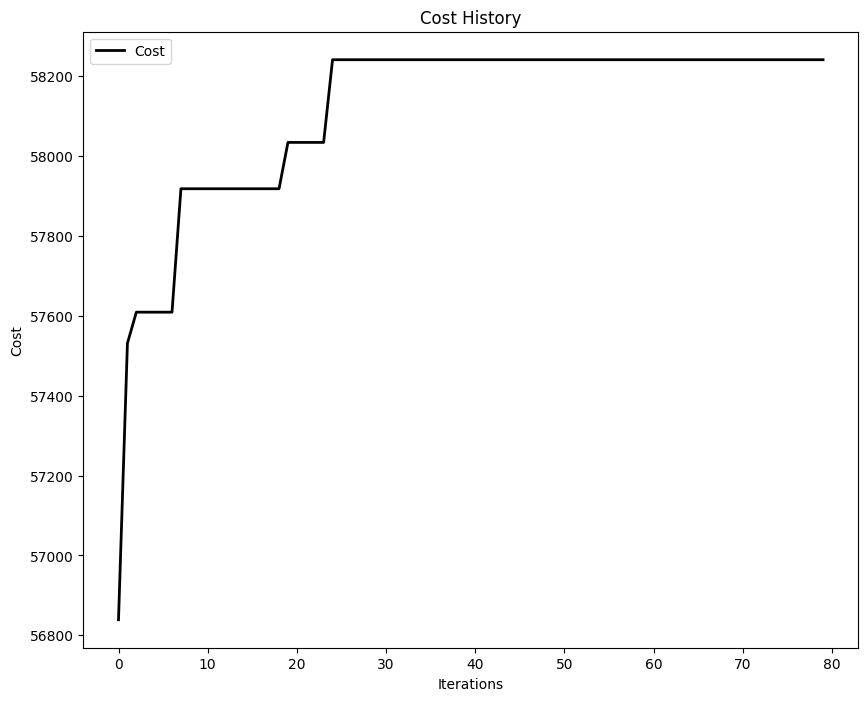

In [13]:
resultPSO.SaveResult(result)